## Read the glass dataset using pandas. Build a classifier to classify the type of glass using:
1.	A random forest classifier 

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics as ms

### Attribute Information:
   1. Id number: 1 to 214
   2. RI: refractive index
   3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as 
                  are attributes 4-10)
   4. Mg: Magnesium
   5. Al: Aluminum
   6. Si: Silicon
   7. K: Potassium
   8. Ca: Calcium
   9. Ba: Barium
  10. Fe: Iron
  11. Type of glass: (class attribute)
      -- 1 building_windows_float_processed
      -- 2 building_windows_non_float_processed
      -- 3 vehicle_windows_float_processed
      -- 4 vehicle_windows_non_float_processed (none in this database)
      -- 5 containers
      -- 6 tableware
      -- 7 headlamps


In [2]:
glass = pd.read_csv("C://Users//hp//Downloads//glass.csv")
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
glass.shape

(214, 10)

In [4]:
glass['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

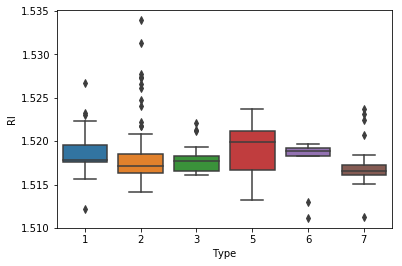

In [5]:
sns.boxplot(x=glass.Type,y=glass.RI)

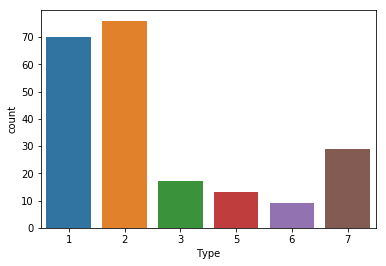

In [6]:
sns.countplot(x="Type",data=glass)

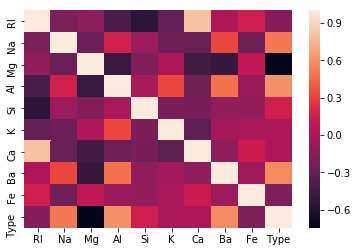

In [7]:
sns.heatmap(glass.corr(),linewidths=0)

In [8]:
np.corrcoef(glass)

array([[1.        , 0.99977291, 0.99973916, ..., 0.99352208, 0.99357682,
        0.99353001],
       [0.99977291, 1.        , 0.99997868, ..., 0.99451527, 0.99455537,
        0.99448718],
       [0.99973916, 0.99997868, 1.        , ..., 0.99458391, 0.99462016,
        0.9945673 ],
       ...,
       [0.99352208, 0.99451527, 0.99458391, ..., 1.        , 0.99999892,
        0.99999445],
       [0.99357682, 0.99455537, 0.99462016, ..., 0.99999892, 1.        ,
        0.99999367],
       [0.99353001, 0.99448718, 0.9945673 , ..., 0.99999445, 0.99999367,
        1.        ]])

## 1.	A random forest classifier 

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
sc = StandardScaler()

In [11]:
Glass = glass.drop('Type',axis = 1)
Glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [12]:
scaled_glass = sc.fit_transform(Glass)

In [13]:
scaled_glass = pd.DataFrame(scaled_glass,columns = Glass.columns)
scaled_glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451


In [14]:
x = scaled_glass
y = glass['Type']

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state = 123)

In [17]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)

In [18]:
model_r = rf.fit(x_train,y_train).predict(x_test)
accuracy_score(y_test,model_r)

0.7846153846153846

## 2.	Adaboost algorithm

In [19]:
from sklearn.ensemble import AdaBoostClassifier
ad = AdaBoostClassifier()

In [20]:
model_ad = ad.fit(x_train,y_train).predict(x_test)
accuracy_score(y_test,model_ad)

0.4153846153846154

## 3.	Compare results from both algorithms and comment on their respective accuracy.

## ANS = As we have noticed that Random forest Classifier predicting better model than Ada boost Many models overfit more if you increase their freedoms, but generally not Random Forests. The reason that Random Forests don’t, is that the freedoms are isolated: each tree starts from scratch. The additional freedoms in a new tree can’t be used to explain small noise in the data, to the extent that other models like neural networks can. That’s because the freedoms are needed to describe the big general trends, which new trees don’t know yet (earlier trees figured it out, but they’re isolated).

## Climate data

The goal is to predict climate model simulation outcomes (column 21, fail or succeed) given scaled values of climate model input parameters (columns 3-20). 

Column 1: Latin hypercube study ID (study 1 to study 3) 

Column 2: simulation ID (run 1 to run 180) 

Columns 3-20: values of 18 climate model parameters scaled in the interval [0, 1] 

Column 21: simulation outcome (0 = failure, 1 = success)

In [21]:
climate = pd.read_csv("C://Users//hp//Desktop//climate.csv")
climate.head()

,Study,Run,vconst_corr,vconst_2,vconst_3,vconst_4,vconst_5,vconst_7,ah_corr,ah_bolus,...,efficiency_factor,tidal_mix_max,vertical_decay_scale,convect_corr,bckgrnd_vdc1,bckgrnd_vdc_ban,bckgrnd_vdc_eq,bckgrnd_vdc_psim,Prandtl,outcome
0,1,1,0.859036,0.927825,0.252866,0.298838,0.170521,0.735936,0.428325,0.567947,...,0.245675,0.104226,0.869091,0.997518,0.448620,0.307522,0.858310,0.796997,0.869893,0
1,1,2,0.606041,0.457728,0.359448,0.306957,0.843331,0.934851,0.444572,0.828015,...,0.616870,0.975786,0.914344,0.845247,0.864152,0.346713,0.356573,0.438447,0.512256,1
2,1,3,0.997600,0.373238,0.517399,0.504993,0.618903,0.605571,0.746225,0.195928,...,0.679355,0.803413,0.643995,0.718441,0.924775,0.315371,0.250642,0.285636,0.365858,1
3,1,4,0.783408,0.104055,0.197533,0.421837,0.742056,0.490828,0.005525,0.392123,...,0.471463,0.597879,0.761659,0.362751,0.912819,0.977971,0.845921,0.699431,0.475987,1
4,1,5,0.406250,0.513199,0.061812,0.635837,0.844798,0.441502,0.191926,0.487546,...,0.551543,0.743877,0.312349,0.650223,0.522261,0.043545,0.376660,0.280098,0.132283,1


In [22]:
# checking the shape of the data
climate.shape

(540, 21)

In [23]:
climate = climate.drop(['Study' , 'Run'],axis = 1)

In [24]:
# test statistics of the data 
climate.describe()

,vconst_corr,vconst_2,vconst_3,vconst_4,vconst_5,vconst_7,ah_corr,ah_bolus,slm_corr,efficiency_factor,tidal_mix_max,vertical_decay_scale,convect_corr,bckgrnd_vdc1,bckgrnd_vdc_ban,bckgrnd_vdc_eq,bckgrnd_vdc_psim,Prandtl,outcome
count,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000
mean,0.500026,0.500097,0.500027,0.500119,0.500001,0.499913,0.500059,0.500076,0.500044,0.500111,0.499984,0.500032,0.499933,0.499944,0.499946,0.500044,0.500020,0.500021,0.914815
std,0.288939,0.288922,0.289067,0.288993,0.288827,0.288852,0.289010,0.288909,0.288860,0.288966,0.289127,0.289014,0.288822,0.288949,0.288923,0.288813,0.288936,0.289013,0.279416
min,0.000414,0.001922,0.001181,0.001972,0.000858,0.000476,0.004590,0.000296,0.003231,0.002015,0.000419,0.001188,0.001312,0.002509,0.000732,0.000891,0.000219,0.000263,0.000000
25%,0.249650,0.251597,0.251540,0.250158,0.250630,0.251325,0.253048,0.250402,0.252661,0.250758,0.251676,0.249669,0.249988,0.249586,0.249974,0.250412,0.252739,0.249723,1.000000
50%,0.499998,0.499595,0.500104,0.500456,0.500903,0.499174,0.499070,0.500074,0.500295,0.500393,0.500322,0.500151,0.500625,0.499080,0.499959,0.500384,0.498955,0.499431,1.000000
75%,0.750042,0.750011,0.749180,0.750348,0.748988,0.748166,0.750109,0.749091,0.748605,0.749447,0.749346,0.749164,0.749569,0.750012,0.747978,0.749256,0.748539,0.749792,1.000000
max,0.999194,0.998815,0.998263,0.997673,0.998944,0.997142,0.998930,0.998506,0.997172,0.999536,0.999942,0.997718,0.997518,0.999795,0.999155,0.997265,0.999306,0.999655,1.000000


## 1.	Use an ensemble classifier to predict the simulation outcomes (fail or succeed). Try a bagging as well as boosting classifier. Which type of model performs better?

In [25]:
x = climate.drop("outcome" , axis = 1)
y = climate.outcome

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.30 , random_state = 100)

In [28]:
from sklearn.ensemble import BaggingClassifier

In [29]:
bag = BaggingClassifier()

In [30]:
model = bag.fit(xtrain,ytrain)

In [31]:
pred = model.predict(xtest)

In [32]:
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
accuracy_score(ytest , pred)

0.9259259259259259

In [35]:
from xgboost.sklearn import XGBClassifier

In [36]:
xb = XGBClassifier()

In [37]:
model_xb = xb.fit(np.array(xtrain),np.array(ytrain)).predict(np.array(xtest))

In [38]:
model_xb

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [39]:
accuracy_score(ytest,model_xb)

0.9444444444444444

## for the Xgboost classifier the accuracy is much better compare to the Bagging one 94 % of accuracy in Xgboosting.

## 2.	What are the most important factors affecting simulation crashes in climate model?

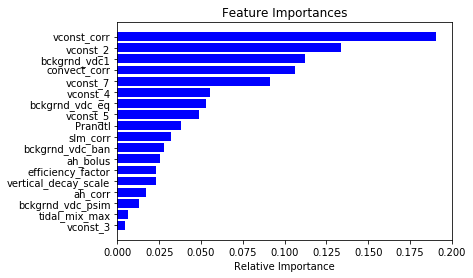

In [48]:
features = climate.columns
importances = xb.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()